In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import torch
import sys
sys.path.append(os.path.join(os.getenv("HOME"), "RNN_Manifold/"))
import decode_1d

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("using {}".format(device))


using cuda


In [3]:
line_phases = np.linspace(start=-np.pi, stop=np.pi, num=200)
line_points = np.zeros((len(line_phases), 2))
line_points[:, 0] = line_phases


In [20]:
line_encoder_line, line_decoder_line, line_costs_line = decode_1d.train(line_points, 0, 1, device, n_training_iterations=4000,
                                                          verbose=True, integration_resamples=30, n_div_bins=10, encoder_hidden_dim=200, decoder_hidden_dim=200, div_weight=1, decoder_weight=10)
print(line_costs_line)


/home/trevor/brainvenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


iteration: 0, decoding loss: 1.6220450401306152, distance cost: 0.010168665088713169, order reduction: 0.00040266200085170567, kl: 0.7492907643318176
iteration: 1, decoding loss: 1.0005097389221191, distance cost: 0.2366788387298584, order reduction: 3.449977157288231e-05, kl: 0.3806759715080261
iteration: 2, decoding loss: 0.48171374201774597, distance cost: 0.7596433758735657, order reduction: 4.576053470373154e-05, kl: 0.18731623888015747
iteration: 3, decoding loss: 0.23937945067882538, distance cost: 1.0449848175048828, order reduction: 5.4916217777645215e-05, kl: 0.1559411585330963
iteration: 8, decoding loss: 0.20075920224189758, distance cost: 0.6456319689750671, order reduction: 9.608686013962142e-06, kl: 0.20504598319530487
iteration: 9, decoding loss: 0.14596250653266907, distance cost: 0.38277363777160645, order reduction: 1.5908059140201658e-05, kl: 0.28773409128189087
iteration: 14, decoding loss: 0.12553958594799042, distance cost: 0.25808119773864746, order reduction: 3

In [22]:
ring_encoder_line, ring_decoder_line, ring_costs_line = decode_1d.train(line_points, 1, 0, device, n_training_iterations=4000,
                                                          verbose=True, integration_resamples=30, encoder_hidden_dim=200, decoder_hidden_dim=200, div_weight=1)
print(ring_costs_line)

iteration: 0, decoding loss: 1.6462974548339844, distance cost: 0.0023749512620270252, order reduction: 0.07759758085012436, kl: 0.9475632905960083
iteration: 1, decoding loss: 1.1685274839401245, distance cost: 0.22234684228897095, order reduction: 0.0002126893086824566, kl: 0.5454627871513367
iteration: 2, decoding loss: 1.010815978050232, distance cost: 0.32988080382347107, order reduction: 0.0006631134310737252, kl: 0.5715240240097046
iteration: 3, decoding loss: 1.0350418090820312, distance cost: 0.19241465628147125, order reduction: 0.000730775878764689, kl: 0.617956280708313
iteration: 4, decoding loss: 0.9523131847381592, distance cost: 0.04260311275720596, order reduction: 0.0006780390394851565, kl: 0.6515482664108276
iteration: 5, decoding loss: 0.7960454225540161, distance cost: 0.01278061605989933, order reduction: 0.0008975838427431881, kl: 0.558250367641449
iteration: 7, decoding loss: 0.5866278409957886, distance cost: 0.01193548645824194, order reduction: 0.000595289689

In [23]:
torch_line_points = torch.tensor(line_points, dtype=torch.get_default_dtype()).to(device)

In [24]:
with torch.no_grad():
    decoded_angles, re_encoded_points, _ = decode_1d.decode_encode_cost(line_decoder_line, line_encoder_line, torch_line_points)

line_decode_line_phases = torch.squeeze(decoded_angles).cpu().numpy()
line_test_embedding_line = re_encoded_points.cpu().numpy()

In [25]:
with torch.no_grad():
    decoded_angles, re_encoded_points, _ = decode_1d.decode_encode_cost(ring_decoder_line, ring_encoder_line, torch_line_points)

ring_decode_line_phases = torch.squeeze(decoded_angles).cpu().numpy()
ring_test_embedding_line = re_encoded_points.cpu().numpy()

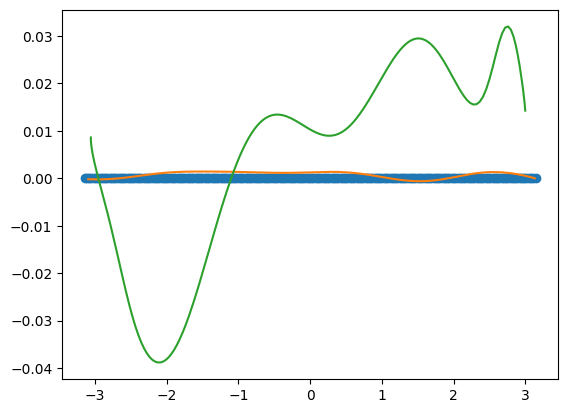

In [26]:
fig, axs = plt.subplots()
axs.scatter(line_points[:, 0], line_points[:, 1], color="C0")
axs.plot(line_test_embedding_line[:, 0], line_test_embedding_line[:, 1], color="C1")
axs.plot(ring_test_embedding_line[:, 0], ring_test_embedding_line[:, 1], color="C2")


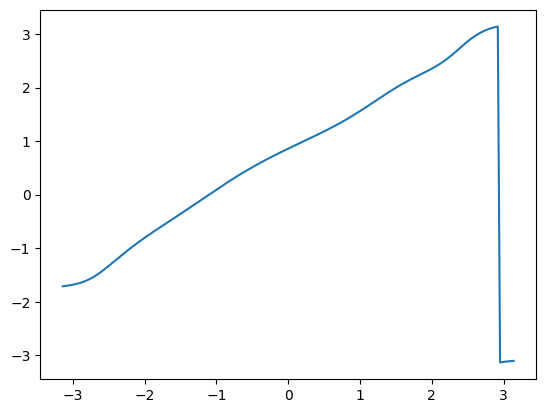

In [27]:
fig, axs = plt.subplots()
axs.plot(line_phases, ring_decode_line_phases)

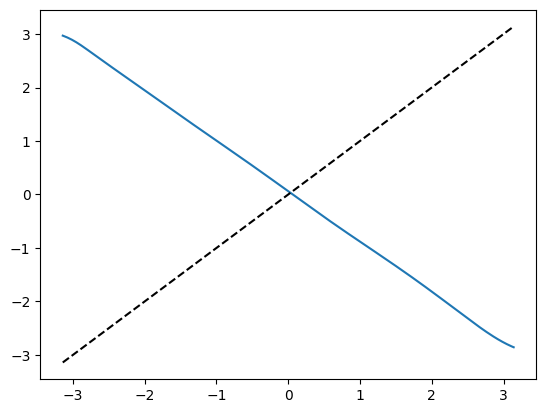

In [28]:
fig, axs = plt.subplots()
axs.plot(line_phases, line_decode_line_phases)
axs.plot(line_phases, line_phases, linestyle="--", color="black")

In [3]:
ring_phases = np.linspace(start=-np.pi, stop=np.pi, num=200)
ring_points = np.stack([np.sin(ring_phases), np.cos(ring_phases)], axis=-1)

In [9]:
line_encoder_ring, line_decoder_ring, line_costs_ring = decode_1d.train(ring_points, 0, 1, device, n_training_iterations=1500,
                                                          verbose=True, integration_resamples=30)
print(line_costs_ring)


iteration: 0, decoding loss: 0.4995790719985962, distance cost: 0.5060911774635315, order reduction: 0.7477681040763855, kl: 10.131383895874023
iteration: 1, decoding loss: 0.48878297209739685, distance cost: 0.25724470615386963, order reduction: 0.0565880723297596, kl: 4.3550262451171875
iteration: 2, decoding loss: 1.1850193738937378, distance cost: 0.005795997101813555, order reduction: 0.05917675420641899, kl: 2.213839054107666
iteration: 3, decoding loss: 0.7710000276565552, distance cost: 0.23950797319412231, order reduction: 0.00011778518091887236, kl: 2.250650405883789
iteration: 5, decoding loss: 0.47932931780815125, distance cost: 0.044379595667123795, order reduction: 0.05805624648928642, kl: 2.2897329330444336
iteration: 8, decoding loss: 0.7215293645858765, distance cost: 0.3612571060657501, order reduction: 0.12422569841146469, kl: 1.3693068027496338
iteration: 9, decoding loss: 0.4750940799713135, distance cost: 0.08819911628961563, order reduction: 0.07611673325300217, 

In [6]:
ring_encoder_ring, ring_decoder_ring, ring_costs_ring = decode_1d.train(ring_points, 1, 0, device, n_training_iterations=1500,
                                                          verbose=True, integration_resamples=30, div_weight=0, decoder_hidden_dim=200, encoder_hidden_dim=200)
print(ring_costs_ring)


iteration: 0, decoding loss: 0.5019458532333374, distance cost: 0.07587793469429016, order reduction: 0.015588819980621338, kl: 6.612325191497803
iteration: 5, decoding loss: 0.420240193605423, distance cost: 0.13886645436286926, order reduction: 0.008047048933804035, kl: 0.23047161102294922
iteration: 6, decoding loss: 0.4134267270565033, distance cost: 0.11928074806928635, order reduction: 0.007226251065731049, kl: 0.2792530059814453
iteration: 7, decoding loss: 0.4058372378349304, distance cost: 0.08049453794956207, order reduction: 0.005444636568427086, kl: 0.3426485061645508
iteration: 8, decoding loss: 0.3985651433467865, distance cost: 0.07159776985645294, order reduction: 0.004374421667307615, kl: 0.42368078231811523
iteration: 10, decoding loss: 0.3906535804271698, distance cost: 0.025066811591386795, order reduction: 0.0033260551281273365, kl: 0.7221519947052002
iteration: 13, decoding loss: 0.3728841245174408, distance cost: 0.008429066278040409, order reduction: 0.002400515

In [7]:
with torch.no_grad():
    line_test_embedding_ring = line_encoder_ring(torch.tensor(np.expand_dims(line_phases, -1), dtype=torch.get_default_dtype()).to(device))
    ring_test_embedding_ring = ring_encoder_ring(torch.tensor(np.expand_dims(line_phases, -1), dtype=torch.get_default_dtype()).to(device))

line_test_embedding_ring = line_test_embedding_ring.cpu().numpy()
ring_test_embedding_ring = ring_test_embedding_ring.cpu().numpy()

NameError: name 'line_encoder_ring' is not defined

NameError: name 'line_test_embedding_ring' is not defined

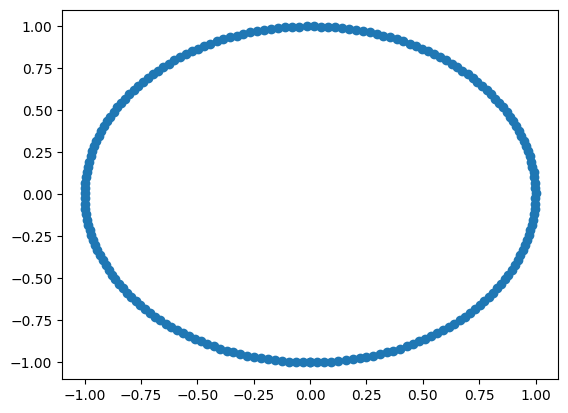

In [8]:
fig, axs = plt.subplots()
axs.scatter(ring_points[:, 0], ring_points[:, 1], color="C0")
axs.plot(line_test_embedding_ring[:, 0], line_test_embedding_ring[:, 1], color="C1")
axs.plot(ring_test_embedding_ring[:, 0], ring_test_embedding_ring[:, 1], color="C2")
